In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
industries=pd.read_csv('C:\\Users\Vitalii\Desktop\SQL tasks\HW6 bases\industries.csv')

industries_df=pd.DataFrame(industries)
print(industries_df)

                        Industry  Score
0                     Blockchain      0
1   Public services / Government     20
2           Adtech / Advertising     10
3                        Telecom     15
4                     Automotive     15
5                     E-commerce     15
6                          Media      5
7                           Інша     10
8                         Dating      5
9             Edtech / Education     15
10                         Legal     20
11                      Big Data     20
12                     Logistics     20
13                  Data Science     20
14             Fintech / Banking     20
15                        Mobile     15
16                     Insurance     10
17                           ERP     10
18                      Gambling      5
19              Machine Learning     20
20                   Agriculture     15
21                       GameDev     10
22          Medtech / Healthcare     15
23               Cloud Computing     20


In [3]:
applications=pd.read_csv('C:\\Users\Vitalii\Desktop\SQL tasks\HW6 bases\pplications.csv')

applications_df=pd.DataFrame(applications)
print(applications_df)

                Applied at   Amount  Age   Gender  \
0      11.30.2022 10:26:37  12000.0   29  Чоловік   
1      11.30.2022 10:26:39      NaN   36  Чоловік   
2      11.30.2022 10:26:58   7500.0   34  Чоловік   
3      11.30.2022 10:27:31   1500.0   23    Жінка   
4      11.30.2022 10:27:34   8400.0   33    Жінка   
...                    ...      ...  ...      ...   
13310     01.09.2023 11:01  12000.0   25  Чоловік   
13311     01.09.2023 11:14  10500.0   28  Чоловік   
13312     01.09.2023 11:19   5790.0   25  Чоловік   
13313     01.09.2023 11:28  13500.0   31  Чоловік   
13314     01.09.2023 11:38  12600.0   32  Чоловік   

                           Industry Marital status  External Rating  \
0                        Blockchain          Other              8.0   
1      Public services / Government         Single              3.0   
2              Adtech / Advertising         Single              4.0   
3                           Telecom         Single              0.0   
4       

In [18]:
#В ноутбуці завантаж таблицю з файлу applications.csv в Pandas DataFrame та почисти дані:
#1. Прибери дублікати applicant_id

applications_df.drop_duplicates(subset='applicant_id', keep='first', inplace=True)

#2. В полі 'External Rating' заповни відсутні значення нулями

applications_df['External Rating'].fillna(0, inplace=True)

#3. В полі 'Education level' заповни відсутні значення текстом “Середня”
applications_df['Education level'].fillna('Середня', inplace=True)

print(applications_df)


                Applied at   Amount  Age   Gender  \
0      11.30.2022 10:26:37  12000.0   29  Чоловік   
1      11.30.2022 10:26:39      NaN   36  Чоловік   
2      11.30.2022 10:26:58   7500.0   34  Чоловік   
3      11.30.2022 10:27:31   1500.0   23    Жінка   
4      11.30.2022 10:27:34   8400.0   33    Жінка   
...                    ...      ...  ...      ...   
13310     01.09.2023 11:01  12000.0   25  Чоловік   
13311     01.09.2023 11:14  10500.0   28  Чоловік   
13312     01.09.2023 11:19   5790.0   25  Чоловік   
13313     01.09.2023 11:28  13500.0   31  Чоловік   
13314     01.09.2023 11:38  12600.0   32  Чоловік   

                           Industry Marital status  External Rating  \
0                        Blockchain          Other              8.0   
1      Public services / Government         Single              3.0   
2              Adtech / Advertising         Single              4.0   
3                           Telecom         Single              0.0   
4       

In [7]:
#Додай до цього DataFrame дані з файлу industries.csv, а саме, рейтинги індустрій.

full_df=pd.merge(applications_df, industries_df, on='Industry', how = 'outer')
print(full_df)

                Applied at   Amount  Age   Gender    Industry Marital status  \
0      11.30.2022 10:26:37  12000.0   29  Чоловік  Blockchain          Other   
1      11.30.2022 10:30:00      NaN   22  Чоловік  Blockchain         Single   
2      11.30.2022 10:31:29  12000.0   29  Чоловік  Blockchain          Other   
3      11.30.2022 10:36:59  30000.0   29  Чоловік  Blockchain         Single   
4      11.30.2022 10:44:28  16050.0   50  Чоловік  Blockchain          Other   
...                    ...      ...  ...      ...         ...            ...   
13310     12.04.2022 12:53  14403.0   34  Чоловік    Robotics        Married   
13311     12.05.2022 16:32   6000.0   30  Чоловік    Robotics        Married   
13312     12.07.2022 16:24    900.0   18  Чоловік    Robotics          Other   
13313  12.14.2022 11:13:46   3900.0   27    Жінка    Robotics         Single   
13314   12.26.2022 9:09:22   2550.0   20  Чоловік    Robotics        Married   

       External Rating                 

In [10]:
#Розрахуй рейтинг заявки за наступними умовами:

#Рейтинг має бути числом від 0 до 100
#Рейтинг - сума оцінок заявки по 6 критеріям.

#З чого складається рейтинг:

#1.Якщо вік заявщика між 35 та 55, до рейтингу додається 20 балів
full_df['Age criteria']=((full_df['Age'] >= 35) & (full_df['Age']  <= 55)) * 20

#2.Якщо заявка була подана не у вихідні, до рейтингу додається 20 балів
full_df['Applied at']=pd.to_datetime(full_df['Applied at']) # переводимо колонку дат у datetime формат

full_df['Day_criteria']=full_df['Applied at'].dt.dayofweek.isin([0,1,2,3,4])*20

#3.Якщо заявщик одружений, до рейтингу додається 20 балів
full_df['Mariage_criteria']=(full_df['Marital status']=='Married')*20

#4.Якщо заявщик знаходиться в Києві чи області, до рейтингу додається 10 балів
full_df['Location_criteria']=(full_df['Location']=='Київ чи область')*10

#5.Значення 'Score' з таблиці industries.csv також додається до заявки (і складає від 0 до 20 балів)
#6.Якщо 'External Rating' більше чи дорівнює 7, до рейтингу додається 20 балів
#7.Якщо 'External Rating' менше чи дорівнює 2, з рейтингу віднімається 20 балів
full_df['external_rate_criteria']=0

for element in full_df['External Rating']:
    if element >=7:
        full_df['external_rate_criteria']=20
    elif element <=2:
        full_df['external_rate_criteria']=-20
#print(full_df)

full_df['Rating']=(full_df['Age criteria']+full_df['Day_criteria']+full_df['Mariage_criteria']+full_df['Location_criteria']+
full_df['external_rate_criteria']+full_df['Score'])

#Рейтинг дорівнює нулю, якщо відсутнє значення 'Amount' або якщо 'External Rating' дорівнює нулю.

full_df.loc[(full_df['Amount'] == 0) | (full_df['External Rating'] == 0), 'Rating'] = 0
#final_df=full_df.drop(['Рейтинг'], axis=1)

print(full_df)



               Applied at   Amount  Age   Gender    Industry Marital status  \
0     2022-11-30 10:26:37  12000.0   29  Чоловік  Blockchain          Other   
1     2022-11-30 10:30:00      NaN   22  Чоловік  Blockchain         Single   
2     2022-11-30 10:31:29  12000.0   29  Чоловік  Blockchain          Other   
3     2022-11-30 10:36:59  30000.0   29  Чоловік  Blockchain         Single   
4     2022-11-30 10:44:28  16050.0   50  Чоловік  Blockchain          Other   
...                   ...      ...  ...      ...         ...            ...   
13310 2022-12-04 12:53:00  14403.0   34  Чоловік    Robotics        Married   
13311 2022-12-05 16:32:00   6000.0   30  Чоловік    Robotics        Married   
13312 2022-12-07 16:24:00    900.0   18  Чоловік    Robotics          Other   
13313 2022-12-14 11:13:46   3900.0   27    Жінка    Robotics         Single   
13314 2022-12-26 09:09:22   2550.0   20  Чоловік    Robotics        Married   

       External Rating                       Educat

In [12]:
#В результуючій таблиці залиш лише заявки з рейтингом більше нуля, ці заявки вважатимуться прийнятими.

indexes_to_drop = full_df[(full_df['Rating']<= 0)].index
#print(indexes_to_drop)

accepted_df=full_df.drop(indexes_to_drop, inplace=False)
accepted_df

,Applied at,Amount,Age,Gender,Industry,Marital status,External Rating,Education level,Location,applicant_id,Score,Age criteria,Day_criteria,Mariage_criteria,Location_criteria,external_rate_criteria,Rating
3,2022-11-30 10:36:59,30000.0,29,Чоловік,Blockchain,Single,7.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,d85404bd5576f05b711ad56cad428463,0,0,20,0,10,-20,10
4,2022-11-30 10:44:28,16050.0,50,Чоловік,Blockchain,Other,15.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,667563fc9922d71c7c2bfa8e9fba9fbc,0,20,20,0,10,-20,30
5,2022-11-30 10:46:30,8550.0,40,Чоловік,Blockchain,Married,1.0,"Вища (бакалавр, спеціаліст, магістр)",Одеса чи область,056d0a80808828a4d4017224fd17491e,0,20,20,20,0,-20,40
6,2022-11-30 10:48:36,8400.0,27,Чоловік,Blockchain,Married,6.0,"Вища (бакалавр, спеціаліст, магістр)",Черкаси чи область,56f735f424804136be23a2c0cce2ac65,0,0,20,20,0,-20,20
7,2022-11-30 10:48:58,5400.0,19,Чоловік,Blockchain,Married,1.0,Ще студент вишу,Дніпро чи область,a4ba22c3ed6b416d74a4c348a1b83e21,0,0,20,20,0,-20,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13310,2022-12-04 12:53:00,14403.0,34,Чоловік,Robotics,Married,13.0,"Вища (бакалавр, спеціаліст, магістр)",NaN,3ed663a677fa53827d49322ef876cd7e,10,0,0,20,0,-20,10
13311,2022-12-05 16:32:00,6000.0,30,Чоловік,Robotics,Married,NaN,"Вища (бакалавр, спеціаліст, магістр)",Львів чи область,825f8a8e84b5c3e810b9d8e3554dafd8,10,0,20,20,0,-20,30
13312,2022-12-07 16:24:00,900.0,18,Чоловік,Robotics,Other,1.0,Ще студент вишу,NaN,5acbd543198ee9c454813d89ee1f670d,10,0,20,0,0,-20,10
13313,2022-12-14 11:13:46,3900.0,27,Жінка,Robotics,Single,1.0,"Вища (бакалавр, спеціаліст, магістр)",Одеса чи область,cd75c270d6f313368e1f5437de19dfa9,10,0,20,0,0,-20,10


In [31]:
#Дані з результуючої таблиці згрупуй за тижнем подачі заявки,
#та виведи на графік середній рейтинг прийнятих заявок у кожен тиждень.

accepted_df.set_index('Applied at', inplace=True)

KeyError: "None of ['Applied at'] are in the columns"

C:\Users\Vitalii\AppData\Local\Temp\ipykernel_9456\87442506.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_by_week = accepted_df.resample('W').mean().reset_index()


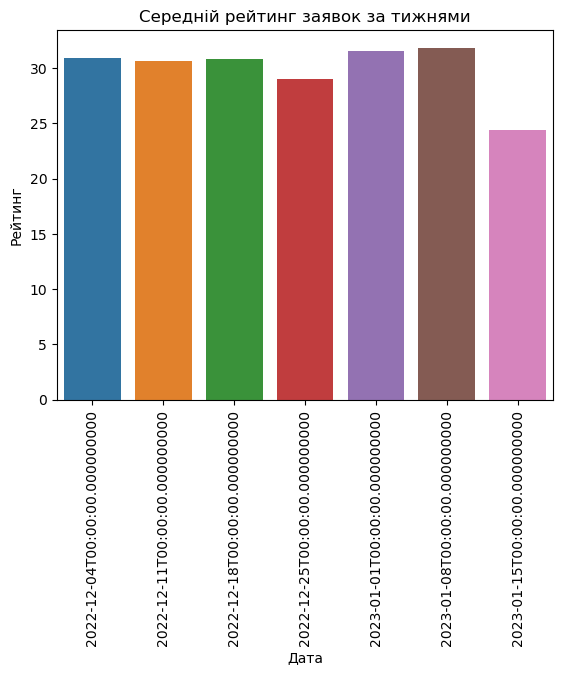

In [29]:
grouped_by_week = accepted_df.resample('W').mean().reset_index()
grouped_by_week_df=pd.DataFrame(grouped_by_week)
#print(grouped_by_week_df)

sns.barplot(x='Applied at', y='Rating', data=grouped_by_week_df)
plt.xticks(rotation=90)
plt.xlabel('Дата')
plt.ylabel('Рейтинг')
plt.title('Середній рейтинг заявок за тижнями')
plt.show()